# AllLife Credit Card Customer Segmentation


Background: 

AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

Objective: 

To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers? 

Data Description:

Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.


GitHub: https://github.com/wbasnight/AIML


Steps to follow:

1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)
3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)
4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
5. Calculate average silhouette score for both methods.(5marks)
6. Compare K-means clusters with Hierarchical clusters. (5 marks)
7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)



In [1]:
#Prevents displaying warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline 


In [3]:
#Loading the data file
CCCData = pd.read_excel("Credit Card Customer Data.xlsx")

#check the file - display the view first 5 rows of bank-full.csv
CCCData.head() 

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
# displays the shape (rows and columns) of the data in the loan dataframe.
CCCData.shape

(660, 7)

In [5]:
# displays the column info for bank-full.csv
CCCData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
# Checking for any null values in the data
CCCData.isnull().values.any() 

False

In [7]:
# displays the calculations of basic statisical data
CCCData.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [8]:
#Generate pandas profiling report of the data - See PPReport.html for report
from pandas_profiling import ProfileReport
prof = ProfileReport(CCCData)
prof.to_file(output_file='CCCDataReport.html')

Dataset statistics from Pandas Profiling Report:

Number of variables	7

Number of observations	660

Missing cells	0

Missing cells (%)	0.0%

Duplicate rows	0

Duplicate rows (%)	0.0%


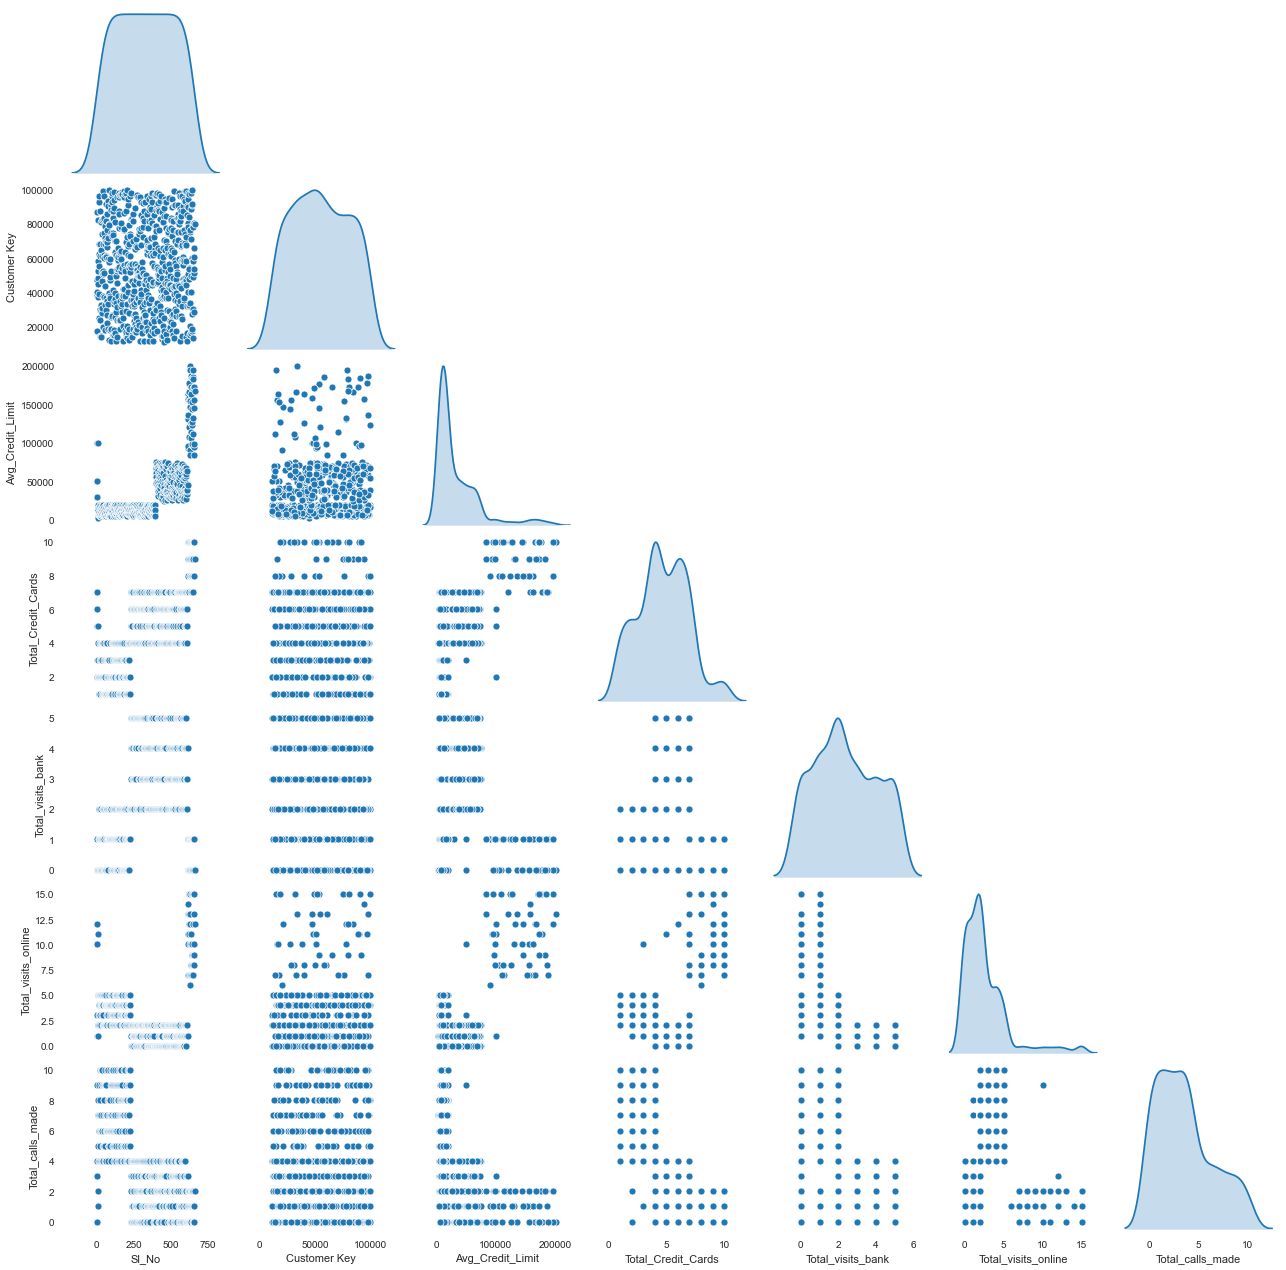

In [9]:
#pairplot of the data
sns.pairplot(CCCData,diag_kind='kde', corner=True)

In [10]:
# Ignoring the first 3 columnms to identifying the different segments 
# in the existing customer based on their spending patterns 
# as well as past interaction with the bank. 

CCCDataModified=CCCData.iloc[:,3:]
CCCDataModified.head()

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2,1,1,0
1,3,0,10,9
2,7,1,3,4
3,5,1,1,4
4,6,0,12,3


<AxesSubplot:>

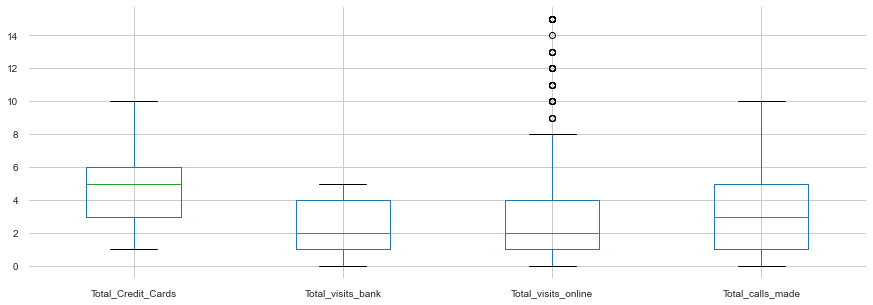

In [11]:
#Boxplotting the modified data
CCCDataModified.boxplot(figsize=(15,5))

Based on the boxplot, the data needs to be scaled in order to normalize for clustering.

In [12]:
#Scaling the data using zscore

from scipy.stats import zscore
CCCDataScaled=CCCDataModified.apply(zscore)
CCCDataScaled.head(10)

,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-1.249225,-0.860451,-0.547490,-1.251537
1,-0.787585,-1.473731,2.520519,1.891859
2,1.058973,-0.860451,0.134290,0.145528
3,0.135694,-0.860451,-0.547490,0.145528
4,0.597334,-1.473731,3.202298,-0.203739
5,-0.787585,-1.473731,-0.547490,1.542593
6,0.135694,-1.473731,2.861408,-0.553005
7,-0.787585,-1.473731,-0.547490,-0.902271
8,-1.249225,-1.473731,-0.206600,-0.553005
9,-0.325946,-1.473731,-0.547490,1.193326


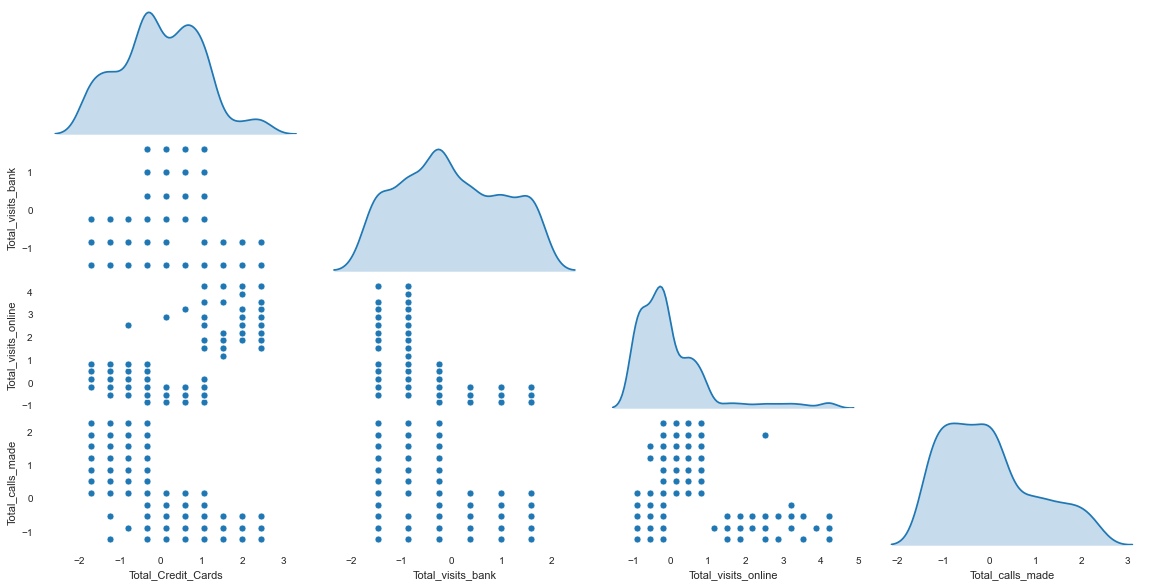

In [13]:
#plotting the new scaled dataframe
sns.pairplot(CCCDataScaled, height=2,aspect=2 , diag_kind='kde', corner=True)

<AxesSubplot:>

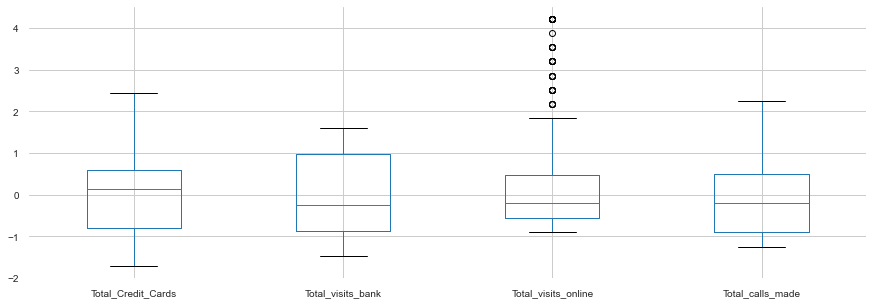

In [14]:
#Boxplotting the scaled data
CCCDataScaled.boxplot(figsize=(15,5))

The boxplot of the scaled data now shows the data better for creating the clusters.  Although there are outliers for Total_visits_online, using log to get rid of the outliers caused a loss of data (NaN)

In [15]:
# Creating the clusters

from sklearn.cluster import KMeans
clusterRange = range(1,10)
cluster_errors = []
for num_clusters in clusterRange:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(CCCDataScaled)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

CCCDataClusters = pd.DataFrame({"num_clusters": clusterRange, "cluster_errors": cluster_errors})
CCCDataClusters[0:15]

,num_clusters,cluster_errors
0,1,2640.000000
1,2,1496.252484
2,3,753.338669
3,4,601.962926
4,5,526.821026
5,6,483.448285
6,7,443.875675
7,8,404.319329
8,9,379.161224


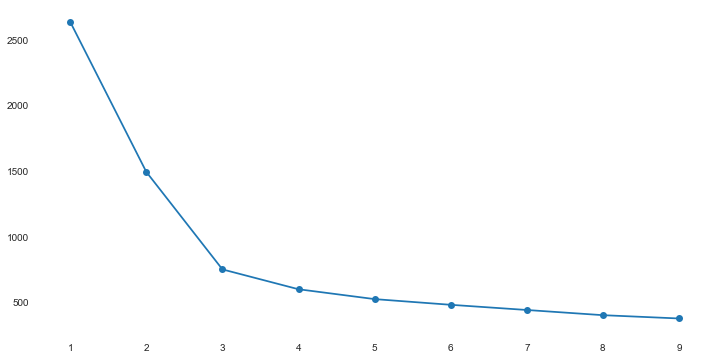

In [16]:
# mapping the elbow plot of the data to determine the number of clusters

from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot(CCCDataClusters.num_clusters, CCCDataClusters.cluster_errors, marker = "o" )

The elbow plot shows the bend in the data is at 3, so setting the number of clusters to 3

In [17]:
#The bend in the data is at 3, so setting the number of clusters to 3

kmeans = KMeans(n_clusters=3, n_init = 5, random_state=100)
kmeans.fit(CCCDataScaled)

KMeans(n_clusters=3, n_init=5, random_state=100)

In [18]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[223 387  50]


In [19]:
#checking the centers in each group

center = kmeans.cluster_centers_
centerData = pd.DataFrame(center, columns = list(CCCDataScaled) )
centerData.transpose()

,0,1,2
Total_Credit_Cards,-1.062913,0.371882,1.862226
Total_visits_bank,-0.904453,0.664034,-1.105763
Total_visits_online,0.325372,-0.552775,2.827319
Total_calls_made,1.152605,-0.551200,-0.874330


Cluster 2 has the highest Total visits online and the highest total credit cards.

Cluster 2 also has the least visits to the bank

Cluster 0 highest number of total calls made

Cluster 1 has the highest visits to the bank

In [20]:
# Determining the Silhouette score for Kmeans

from sklearn.metrics import silhouette_score
Kmeans_silhouette_score = silhouette_score(CCCDataScaled,labels)

Kmeans_silhouette_score


0.5429682646592655

*Silhouette Score is better when closer 1 and worse when closer to -1

Comparing the different methods for distance: Euclidean, Manhattan, Minkowski.  In each method a different linkage is used: Average, Single, Complete.

In [21]:
# Clustering using the Euclidean metric

from scipy.spatial.distance import pdist 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

zEuclidean0 = linkage(CCCDataScaled, metric='euclidean', method='ward')
cEuclidean0, coph_dists = cophenet(zEuclidean0 , pdist(CCCDataScaled))

print (cEuclidean0)

zEuclidean = linkage(CCCDataScaled, metric='euclidean', method='average')
cEuclidean, coph_dists = cophenet(zEuclidean , pdist(CCCDataScaled))

print (cEuclidean)

zEuclidean2 = linkage(CCCDataScaled, metric='euclidean', method='single')
cEuclidean2, coph_dists = cophenet(zEuclidean2 , pdist(CCCDataScaled))

print (cEuclidean2)

zEuclidean3 = linkage(CCCDataScaled, metric='euclidean', method='complete')
cEuclidean3, coph_dists = cophenet(zEuclidean3 , pdist(CCCDataScaled))

print (cEuclidean3)

0.7655804990207699
0.8664697602099743
0.6343009131945331
0.8451260924118872


*If the measure is closer to 1, the better the clustering

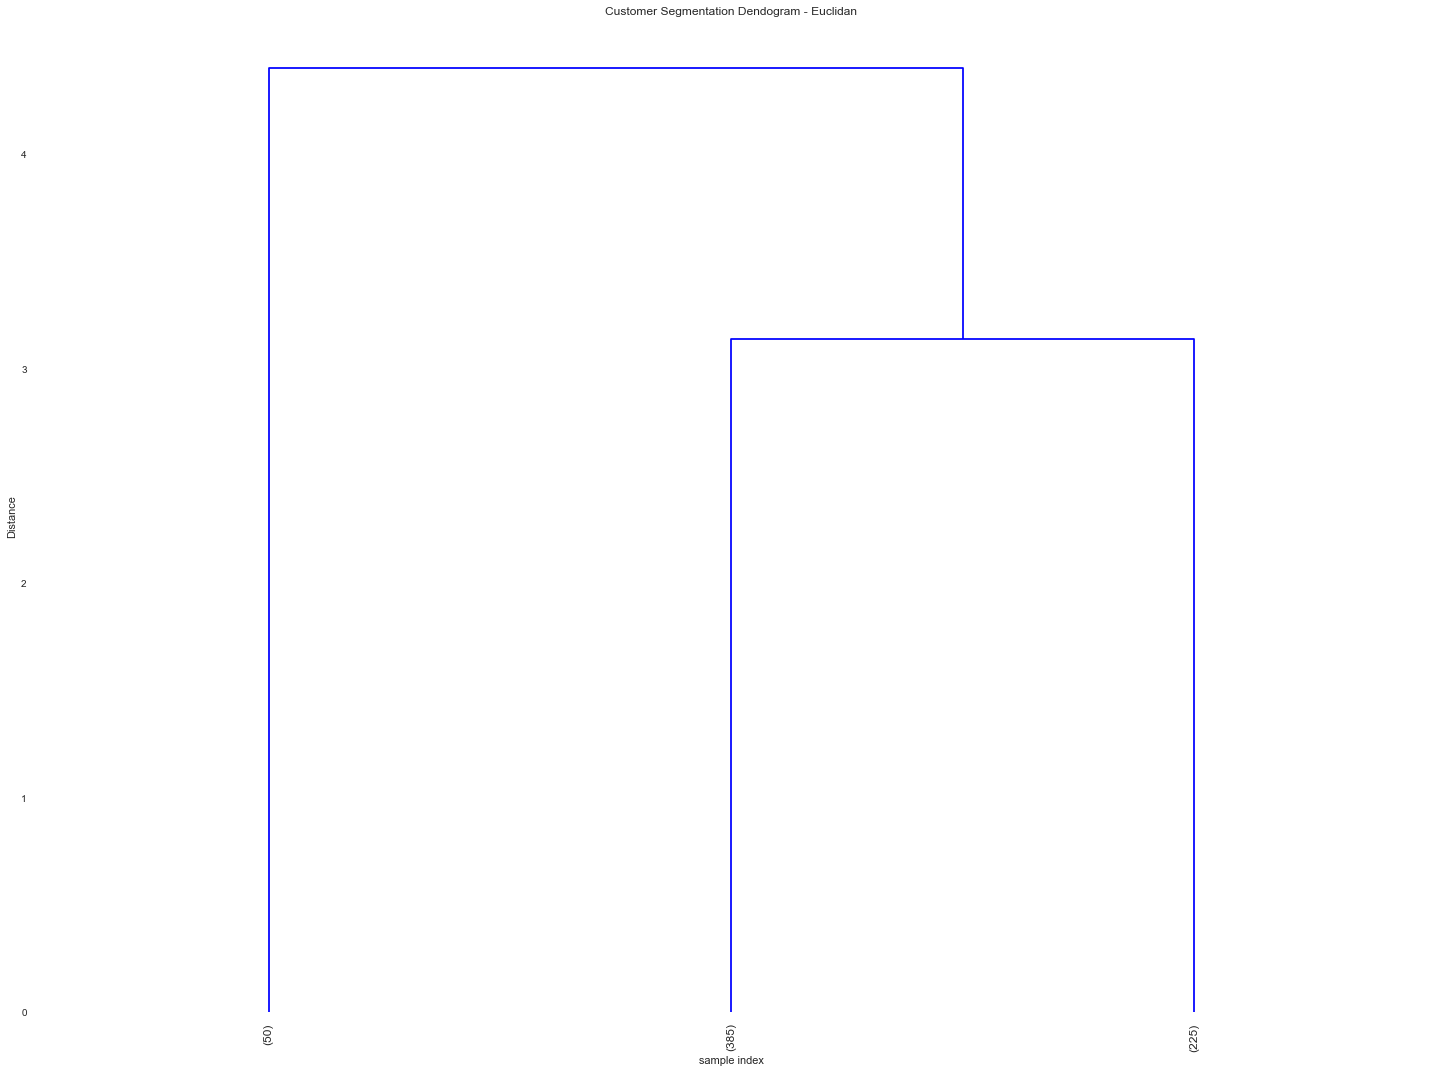

In [22]:
#plotting dendogram of 3 clusters - Euclidean

plt.figure(figsize=(20, 15))
plt.title('Customer Segmentation Dendogram - Euclidan')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(zEuclidean, leaf_rotation=90.,truncate_mode='lastp', p=3, leaf_font_size=12. )
plt.tight_layout()

In [23]:
hi_silhouette_score = silhouette_score(CCCDataModified,labels)

hi_silhouette_score


0.5507652260962811

*Silhouette Score is better when closer 1 and worse when closer to -1

In [24]:
# Clustering using the Manhattan metric

zManhattan = linkage(CCCDataScaled, metric='cityblock', method='average')
cManhattan, coph_dists = cophenet(zManhattan , pdist(CCCDataScaled))
print (cManhattan)

zManhattan2 = linkage(CCCDataScaled, metric='cityblock', method='single')
cManhattan2, coph_dists = cophenet(zManhattan2 , pdist(CCCDataScaled))
print (cManhattan2)

zManhattan3 = linkage(CCCDataScaled, metric='cityblock', method='complete')
cManhattan3, coph_dists = cophenet(zManhattan3 , pdist(CCCDataScaled))
print (cManhattan3)

0.8634376374580395
0.6139113501192403
0.8366049043817889


*If the measure is closer to 1, the better the clustering

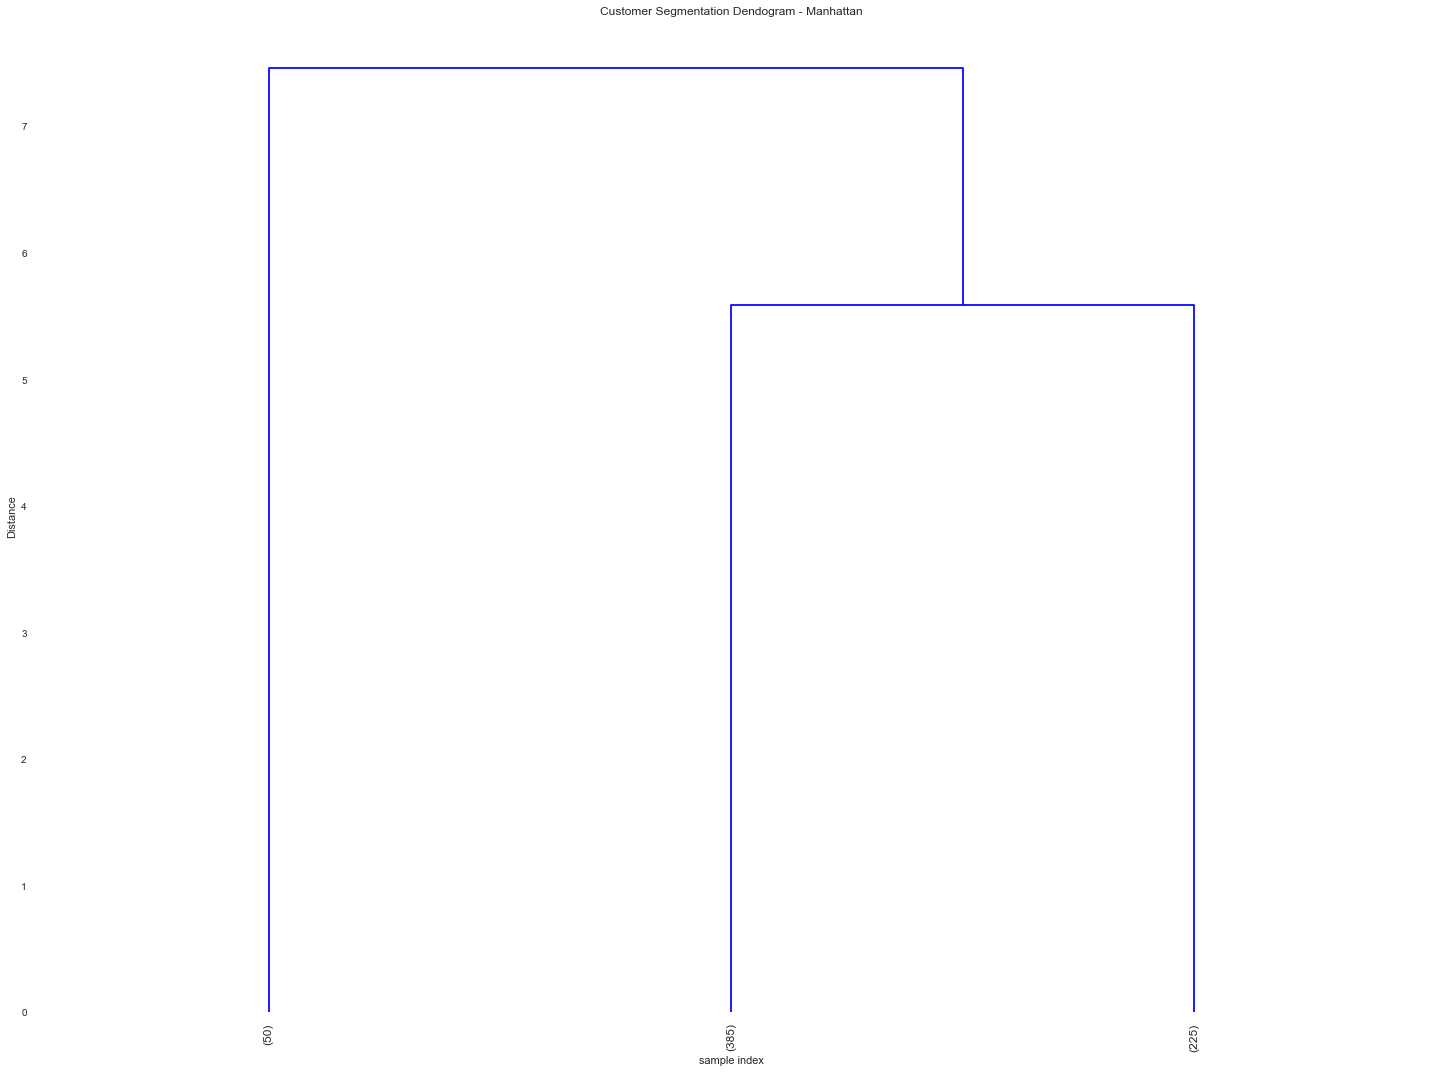

In [25]:
#plotting dendogram of 3 clusters - Manhattan


plt.figure(figsize=(20, 15))
plt.title('Customer Segmentation Dendogram - Manhattan')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(zManhattan, leaf_rotation=90.,truncate_mode='lastp', p=3, leaf_font_size=12. )
plt.tight_layout()

In [26]:
# Clustering using the Minkowski metric

zMinkowski = linkage(CCCDataScaled, metric='minkowski', method='average')
cMinkowski, coph_dists = cophenet(zMinkowski , pdist(CCCDataScaled))
print (cMinkowski)

zMinkowski2 = linkage(CCCDataScaled, metric='minkowski', method='single')
cMinkowski2, coph_dists = cophenet(zMinkowski2, pdist(CCCDataScaled))
print (cMinkowski2)

zMinkowski3 = linkage(CCCDataScaled, metric='minkowski', method='complete')
cMinkowski3, coph_dists = cophenet(zMinkowski3 , pdist(CCCDataScaled))
print (cMinkowski3)

0.8664697602099743
0.6343009131945331
0.8451260924118872


*If the measure is closer to 1, the better the clustering

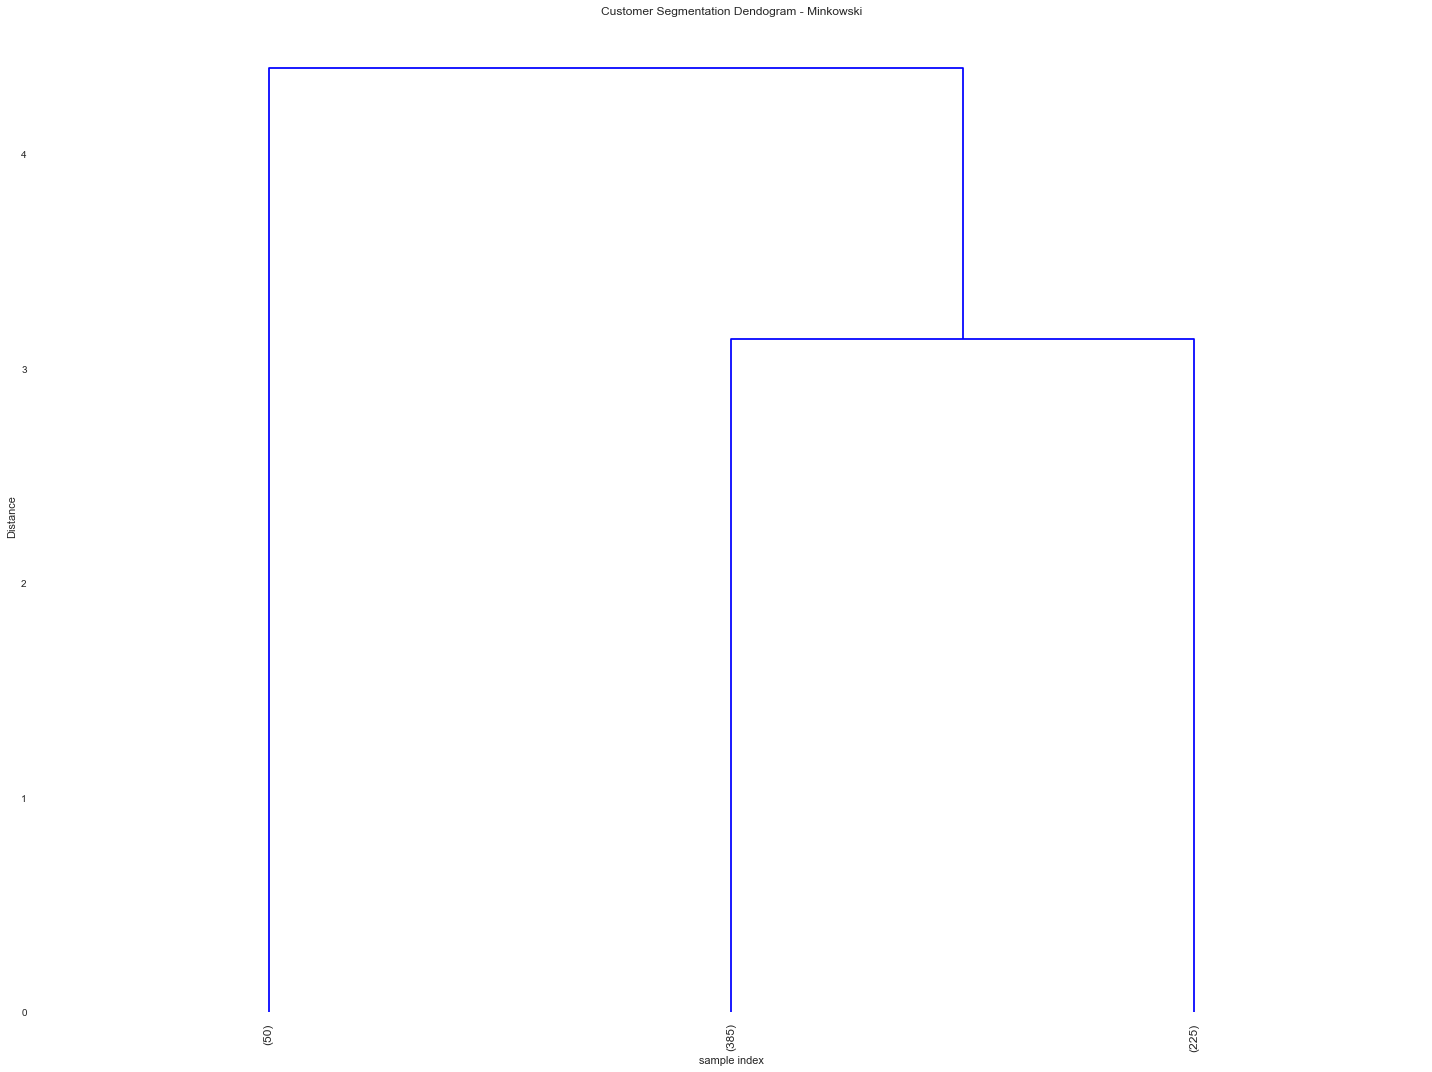

In [27]:
#plotting dendogram of 3 clusters - Minkowski

plt.figure(figsize=(20, 15))
plt.title('Customer Segmentation Dendogram - Minkowski')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(zMinkowski, leaf_rotation=90.,truncate_mode='lastp', p=3, leaf_font_size=12. )
plt.tight_layout()

In [28]:
#Building and displaying comparision of the Silhouette scores
Sscore =[Kmeans_silhouette_score,hi_silhouette_score,]


col={'Silhoutte Score':Sscore}
models=['Kmeans Clustering','Hierarchical Clustering']
dfScores=pd.DataFrame(data=col,index=models)
dfScores

,Silhoutte Score
Kmeans Clustering,0.542968
Hierarchical Clustering,0.550765


In this dataset clustering, the Silhoutte score for both Kmeans and Hierarchical clustering are very close.  It is probably because the dataset is small (Kmeans handles big data better).

In [30]:
#Building and displaying comparision of the distance methods 

dMethod =  [cEuclidean,cManhattan,cMinkowski]
dMethod2 = [cEuclidean2,cManhattan2,cMinkowski2]
dMethod3 = [cEuclidean3,cManhattan3,cMinkowski3]
dMethod4 = [cEuclidean0, 'N/A', 'N/A']

dcol={'Average':dMethod, 'Single':dMethod2, 'Complete':dMethod3, 'Ward (Euclidean Only)':dMethod4}
dmethods=['Euclidean Metric','Manhattan Metric', 'Minkowski Metric']
dfDistance=pd.DataFrame(data=dcol,index=dmethods)
dfDistance

,Average,Single,Complete,Ward (Euclidean Only)
Euclidean Metric,0.866470,0.634301,0.845126,0.76558
Manhattan Metric,0.863438,0.613911,0.836605,N/A
Minkowski Metric,0.866470,0.634301,0.845126,N/A


From the above comparisions, using the 'average' method, deemed the best of result of all 3 metrics.  The 'average' and 'complete' were both better than 'ward'.  As 'single' is the least of all.

Minkowski and Eudledean had the same result because when the order is 2 (p=2), the Minkowski and Euclidean distances are the same (as the result above). If the order is 1 (p=1), the Minkowski and Manhattan distances would have the same.

Key Questions:

How many different segments of customers are there? 
There are 4 different segments:

    Total_Credit_Cards
    Total_visits_bank
    Total_visits_online
    Total_calls_made




How are these segments different from each other?

    Total_Credit__Cards: the total number of credit cards the customer has. 
    Total_visits_bank: customer physical visits to a bank location.
    Total_visits_online: customer visits to the banking website.
    Total_calls_made: customer calls made to the bank by phone.


What are your recommendations to the bank on how to better market to and service these customers? 

According the the data clustering, the customer online visits and the amount with total credit cards were high.  The recommendation would be to market better online services customers in hopes to retain the online customers, as well as, entice the customers who visit and call to try the online service.